# Long-term

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plt.style.use('seaborn-notebook')
plt.style.use('ggplot')
#plt.style.use('fivethirtyeight')
import seaborn as sns
import math
import gc
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.time import SimultaneousActivation
from mesa.datacollection import DataCollector
import random

%matplotlib inline

### Model inputs

In the model health states are declared as:
- a0: *susceptible to both breast - and ovarian cancer*
- a1: *susceptible to ovarian cancer only (assumed not susceptible to a second (relative) or third (index) round of bc*
- a2: *susceptible to breast cancer only (survivor of ovarian cancer)*
- b0: *breast cancer diagnosis*
- b1: *breast cancer stage 1*
- b2: *breast cancer stage 2*
- b3: *breast cancer stage 3*
- b4: *breast cancer stage 4*
- c0: *ovarian cancer diagnosis*
- c1: *ovarian cancer local*
- c2: *ovarian cancer regional*
- c3: *ovarian cancer distant*
- d0: *prophylactic masectomy and oophorectomy*
- d1: *prophylactic masectomy only*
- d2: *prophylactic oophorectomy only*
- e0: *no increased risk for cancer in respective organs (following successful d0)*
- f0: *dead from any cause ('normal' mortality + exces mortality due to organ specific cancer)*
- f1: *dead from breast cancer*
- f2: *dead from ovarian cancer*

#### Transition probability sets

In [2]:
from Transitions import *

C:\Users\larsasp\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\common.py:1920: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype)


## Model specification

In [3]:
from Controls import initial_age
initial_age

In [4]:
from mesa import Agent, Model

class Person(Agent):
    """An agent"""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.age = initial_age.value
        self.state_a0 = 1
        self.state_a1 = 0
        self.state_a2 = 0
#        self.state_a2r = 0
        self.state_b0 = 0
        self.state_b1 = 0
        self.state_b2 = 0
        self.state_b3 = 0
        self.state_b4 = 0
        self.state_c0 = 0
        self.state_c1 = 0
        self.state_c2 = 0
        self.state_c3 = 0
        self.state_d0 = 0
        self.state_d1 = 0
        self.state_d2 = 0
        self.state_e0 = 0
        self.state_f0 = 0
        self.state_f1 = 0
        self.state_f2 = 0
        self.time_in_b1 = 0
        self.time_in_b2 = 0
        self.time_in_b3 = 0
        self.time_in_b4 = 0
        self.time_in_c1 = 0
        self.time_in_c2 = 0
        self.time_in_c3 = 0
        self.cycle = 0
        
    def step(self):
        """
        state a0 is the starting state for all agents in self.cycle = 0
        """
        if self.state_a0 == 1:
            if from_a0(age = self.age)[0] == 1:
                self.state_a0 += 0
                self.age += 1
            elif from_a0(age = self.age)[1] == 1:
                self.state_b0 += 1
                self.state_a0 -= 1
                self.age += 1
            elif from_a0(age = self.age)[2] == 1:
                self.state_c0 += 1
                self.state_a0 -= 1
                self.age += 1
            elif from_a0(age = self.age)[3] == 1:
                self.state_d0 += 1
                self.state_a0 -= 1
                self.age += 1
            elif from_a0(age = self.age)[4] == 1:
                self.state_d1 += 1
                self.state_a0 -= 1
                self.age += 1
            elif from_a0(age = self.age)[5] == 1:
                self.state_d2 += 1
                self.state_a0 -= 1
                self.age += 1
            else:
                self.state_f0 += 1
                self.state_a0 -= 1
                    
            if self.cycle > 0:
                
                if self.state_a1 == 1:
                    if from_a1(age = self.age)[0] == 1:
                        self.state_a1 += 0
                        self.age += 1
                    elif from_a1(age = self.age)[1] == 1:
                        self.state_c0 += 1
                        self.state_a1 -= 1
                        self.age += 1
                    elif from_a1(age = self.age)[2] == 2:
                        self.state_d2 += 1
                        self.state_a1 -= 1
                        self.age += 1
                    else:
                        self.state_f0 += 1
                        self.state_a1 -= 1
                        
                if self.state_a2 == 1:
                    if from_a2(age = self.age)[0] == 1:
                        self.state_a2 += 0
                        self.age += 1
                    if from_a2(age = self.age)[1] == 1:
                        self.state_b0 += 1
                        self.state_a2 -= 1
                        self.age += 1
                    if from_a2(age = self.age)[3] == 1:
                        self.state_d1 += 1
                        seøf.state_a2 -= 1
                        self.age += 1
                    else:
                        self.state_f0 += 1
                        self.state_a2 -= 1
                        
#                if self.state_a2r == 1:
#                    if from_a2r(age = self.age)[0] == 1:
#                        self.state_a2 += 0
#                        self.age += 1
#                    if from_a2r(age = self.age)[1] == 1:
#                        self.state_b0 += 1
#                        self.state_a2 -= 1
#                        self.age += 1
#                    if from_a2r(age = self.age)[3] == 1:
#                        self.state_d1 += 1
#                        seøf.state_a2 -= 1
#                        self.age += 1
#                    else:
#                        self.state_f0 += 1
#                        self.state_a2 -= 1

                if self.state_b0 == 1:
                    """
                    Do NOT append age variable, this is a tunnel state
                    """
                    if from_b0(age = self.age)[0] == 1:
                        self.state_b1 += 1
                        self.state_b0 -= 1
                    if from_b0(age = self.age)[1] == 1:
                        self.state_b2 += 1
                        self.state_b0 -= 1
                    if from_b0(age = self.age)[2] == 1:
                        self.state_b3 += 1
                        self.state_b0 -= 1
                    if from_b0(age = self.age)[3] == 1:
                        self.state_b4 += 1
                        self.state_b0 -= 1
                        
                if self.state_b1 == 1:
                    if from_b1(self.age, self.time_in_b1)[1] == 1:
                        self.state_f1 += 1
                        self.state_b1 -= 1   
                    elif from_b1(self.age, self.time_in_b1)[0] == 1:
                        self.state_b1 += 0
                        self.age += 1
                        self.time_in_b1 += 1
                        if self.time_in_b1==10:
                            self.state_a1 += 1
                            self.state_b1 -= 1
                            self.age += 1
#                            self.time_in_b1 = 0


                if self.state_b2 == 1:
                    if from_b2(self.age, self.time_in_b2)[1] == 1:
                        self.state_f1 += 1
                        self.state_b2 -= 1          
                    elif from_b2(self.age, self.time_in_b2)[0] == 1:
                        self.state_b2 += 0
                        self.age += 1
                        self.time_in_b2 += 1
                        if self.time_in_b2==10:
                            self.state_a1+=1
                            self.state_b2-=1
                            self.age += 1
#                            self.time_in_b2 = 0

                        
                if self.state_b3 == 1:
                    if from_b3(self.age, self.time_in_b3)[1] == 1:
                        self.state_f1 += 1
                        self.state_b3 -= 1              
                    elif from_b3(self.age, self.time_in_b3)[0] == 1:
                        self.state_b3 += 0
                        self.age += 1
                        self.time_in_b3 += 1
                        if self.time_in_b3 == 10:
                            self.state_a1 += 1
                            self.state_b3 -= 1
                            self.age += 1
#                            self.time_in_b3 = 0

                        
                if self.state_b4 == 1:
                    if from_b4(self.age, self.time_in_b4)[1] == 1:
                        self.state_f1 += 1
                        self.state_b4 -= 1   
                    elif from_b4(self.age, self.time_in_b4)[0] == 1:
                        self.state_b4 += 0
                        self.age += 1
                        self.time_in_b4 += 1
                        if self.time_in_b4 == 10:
                            self.state_a1 += 1
                            self.state_b4 -= 1
                            self.age += 1
#                            self.time_in_b4 = 0
        
                
                if self.state_c0 == 1:
                    """
                    Do NOT append age variable, this is a tunnel state
                    """
                    if from_c0()[0] == 1:
                        self.state_c1 += 1
                        self.state_c0 -= 1
                    if from_c0()[1] == 1:
                        self.state_c2 += 1
                        self.state_c0 -= 1
                    if from_c0()[2] == 1:
                        self.state_c3 += 1
                        self.state_c0 -= 1
                        
                if self.state_c1 == 1:
                    if from_c1(age = self.age, time_in_c1 = self.time_in_c1)[0] == 1:
                        self.state_c1 +=0
                        self.age += 1
                        self.time_in_c1 += 1
                        if self.time_in_c1 == 10:
                            """
                            With 10 cycles in state_c1, agent transfers to state_a2
                            """
                            self.state_a2 += 1
                            self.state_c1 -= 1
                            self.age += 1
#                            self.time_in_c1 = 0
                    if from_c1(age = self.age, time_in_c1 = self.time_in_c1)[1] == 1:
                        self.state_f2 += 1
                        self.state_c1 -= 1
                        
                if self.state_c2 == 1:
                    if from_c2(age = self.age, time_in_c2 = self.time_in_c2)[0] == 1:
                        self.state_c2 +=0
                        self.age += 1
                        self.time_in_c2 += 1
                        if self.time_in_c2 == 10:
                            """
                            With 10 cycles in state_c2, agent transfers to state_a2
                            """
                            self.state_a2 += 1
                            self.state_c2 -= 1
                            self.age += 1
#                            self.time_in_c2 = 0
                    if from_c2(age = self.age, time_in_c2 = self.time_in_c2)[1] == 1:
                        self.state_f2 += 1
                        self.state_c2 -= 1
                
                if self.state_c3 == 1:
                    if from_c3(age = self.age, time_in_c3 = self.time_in_c3)[0] == 1:
                        self.state_c3 +=0
                        self.age += 1
                        self.time_in_c3 += 1
                        if self.time_in_c3 == 10:
                            """
                            With 10 cycles in state_c3, agent transfers to state_a2
                            """
                            self.state_a2 += 1
                            self.state_c3 -= 1
                            self.age += 1
#                            self.time_in_c3 = 0
                    if from_c3(age = self.age, time_in_c3 = self.time_in_c3)[1] == 1:
                        self.state_f2 += 1
                        self.state_c3 -= 1
                        
                if self.state_d0 == 1:
                    if from_d0(age = self.age) == 1:
                        self.state_d0 += 0
                        self.age += 1
                    else:
                        self.state_f0 += 1
                        self.state_d0 -= 1
                        
                if self.state_d1 == 1:
                    if from_d1(age = self.age) == 1:
                        self.state_d1 += 0
                        self.age += 1
                    else:
                        self.state_f0 += 1
                        self.state_d1 -= 1        
                        
                if self.state_d2 == 1:
                    if from_d2(age = self.age) == 1:
                        self.state_d2 += 0
                        self.age += 1
                    else:
                        self.state_f0 += 1
                        self.state_d2 -= 1
                        
                if self.state_e0 == 1:
                    if from_e0(age = self.age) == 1:
                        self.state_e0 += 0
                        self.age += 1
                    else:
                        self.state_f0 += 1
                        self.state_e0 -= 1
                        
        self.cycle += 1

In [5]:
def trace_a0(model):
    agent_a0 = [agent.state_a0 for agent in model.schedule.agents]
    x = sum(agent_a0)
    N = model.num_agents
    B = x / N
    return x

def trace_a1(model):
    agent_a1 = [agent.state_a1 for agent in model.schedule.agents]
    x = sum(agent_a1)
    N = model.num_agents
    B = x / N
    return x

def trace_a2(model):
    agent_a2 = [agent.state_a2 for agent in model.schedule.agents]
    x = sum(agent_a2)
    N = model.num_agents
    B = x / N
    return x

#def trace_A2r(model):
#    agent_a2r = [agent.state_A2r for agent in model.schedule.agents]
#    x = sum(agent_a2r)
#    N = model.num_agents
#    B = x / N
#    return B

def trace_b1(model):
    agent_b1 = [agent.state_b1 for agent in model.schedule.agents]
    x = sum(agent_b1)
    N = model.num_agents
    B = x / N
    return x

def trace_b2(model):
    agent_b2 = [agent.state_b2 for agent in model.schedule.agents]
    x = sum(agent_b2)
    N = model.num_agents
    B = x / N
    return x

def trace_b3(model):
    agent_b3 = [agent.state_b3 for agent in model.schedule.agents]
    x = sum(agent_b3)
    N = model.num_agents
    B = x / N
    return x

def trace_b4(model):
    agent_b4 = [agent.state_b4 for agent in model.schedule.agents]
    x = sum(agent_b4)
    N = model.num_agents
    B = x / N
    return x

def trace_bc_allstage(model):
    agent_bca = ([agent.state_b4 for agent in model.schedule.agents] 
                 +[agent.state_b2 for agent in model.schedule.agents]
                 +[agent.state_b3 for agent in model.schedule.agents]
                 +[agent.state_b4 for agent in model.schedule.agents])
    x = sum(agent_bca)
    N = model.num_agents
    B = x / N
    return x

def trace_c1(model):
    agent_c1 = [agent.state_c1 for agent in model.schedule.agents]
    x = sum(agent_c1)
    N = model.num_agents
    B = x / N
    return x

def trace_c2(model):
    agent_c2 = [agent.state_c2 for agent in model.schedule.agents]
    x = sum(agent_c2)
    N = model.num_agents
    B = x / N
    return x

def trace_c3(model):
    agent_c3 = [agent.state_c3 for agent in model.schedule.agents]
    x = sum(agent_c3)
    N = model.num_agents
    B = x / N
    return x

def trace_oc_allstage(model):
    agent_oca = ([agent.state_c1 for agent in model.schedule.agents]
                 +[agent.state_c2 for agent in model.schedule.agents]
                 +[agent.state_c3 for agent in model.schedule.agents])
    x = sum(agent_oca)
    N = model.num_agents
    B = x / N
    return x

def trace_e0(model):
    agent_e0 = [agent.state_e0 for agent in model.schedule.agents]
    x = sum(agent_e0)
    N = model.num_agents
    B = x / N
    return x

def trace_f0(model):
    agent_f0 = [agent.state_f0 for agent in model.schedule.agents]
    x = sum(agent_f0)
    N = model.num_agents
    B = x / N
    return x

def trace_f1(model):
    agent_f1 = [agent.state_f1 for agent in model.schedule.agents]
    x = sum(agent_f1)
    N = model.num_agents
    B = x / N
    return x

def trace_f2(model):
    agent_f2 = [agent.state_f2 for agent in model.schedule.agents]
    x = sum(agent_f2)
    N = model.num_agents
    B = x / N
    return x

In [6]:
class hboc(Model):
    """A model with some number of agents."""
    def __init__(self, N):
        self.num_agents = N
        self.cycle  = 0
        self.schedule = RandomActivation(self)
        
        # Create agents
        for i in range(self.num_agents):
            a = Person(i, self)
            self.schedule.add(a)    
        # Store data after each step
        self.datacollector = DataCollector(model_reporters=
                                           {"a0": trace_a0,
                                            "a1": trace_a1,
                                            "a2": trace_a2,
                                            "b": trace_bc_allstage,
                                            "c": trace_oc_allstage,
#                                            "b1": trace_b1,
#                                            "b2": trace_b2,
#                                            "b3": trace_b3,
#                                            "b4": trace_b4,
#                                            "c1": trace_c1,
#                                            "c2": trace_c2,
#                                            "c3": trace_c3,
                                            "e": trace_e0,
                                            "f1": trace_f0,
                                            "f2": trace_f1,
                                            "f3": trace_f2}#,
#                                           agent_reporters=
#                                           {"State_a0": lambda a: a.state_a0,
#                                            "State_a1": lambda a: a.state_a1,
#                                            "State_a2": lambda a: a.state_a2,
#                                            "State_b1": lambda a: a.state_b1,
#                                            "State_b2": lambda a: a.state_b2,
#                                            "State_b3": lambda a: a.state_b3,
#                                            "State_b4": lambda a: a.state_b4,
#                                            "State_c1": lambda a: a.state_c1,
#                                            "State_c2": lambda a: a.state_c2,
#                                            "State_c3": lambda a: a.state_c3,
#                                            "State_e0": lambda a: a.state_e0,
#                                            "State_f0": lambda a: a.state_f0,
#                                            "State_f1": lambda a: a.state_f1,
#                                            "State_f2": lambda a: a.state_f2}
                                          )
        
    def step(self):
        # store data  
        self.datacollector.collect(self)
                
        #advnace a step
        self.schedule.step()

In [11]:
model = hboc(1000)
for i in range(51):
    model.step()


In [12]:
#all_agent_movement = model.datacollector.get_agent_vars_dataframe()
#sum(all_agent_movement.State_a1)

In [13]:
output = model.datacollector.get_model_vars_dataframe()

In [14]:
# Det ser kanskje ut som om koden har en bug som gjør at funksjonen med "dersom i state_bi" i 10 år -> a1, 
# den fungerer faktisk, men i o m at denne kreften er såpass sjelden på aggregert nivå, og at den har en økt dødelighet
# ser det slik ut. 

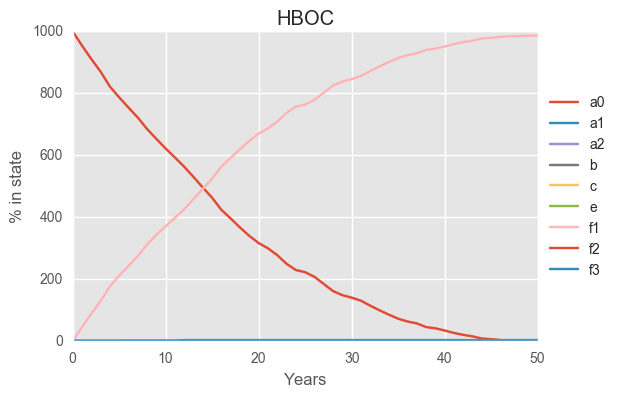

In [15]:
ax = output.plot()
ax.set_xlabel('Years')
ax.set_ylabel('% in state')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('HBOC')
#plt.savefig('M:\pc\Desktop\plot.png', dpi = 400)